In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [5]:
df = pd.read_csv('cars.csv')
len(df)

4340

In [11]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [15]:
df_n = df.drop(['transmission', 'seller_type'], axis = 1)

In [16]:
df_n

,name,year,selling_price,km_driven,fuel,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Second Owner
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,First Owner


In [79]:
from matplotlib import pyplot as plt
%matplotlib inline

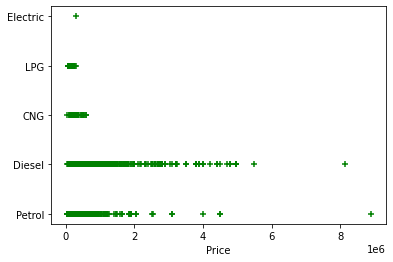

In [82]:
plt.scatter(df_n.selling_price, df_n.fuel, marker='+', c='g')
plt.xlabel('Fuel')
plt.xlabel('Price')
plt.show()

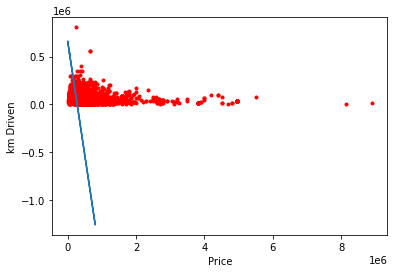

In [95]:
plt.scatter(df_n.selling_price, df_n.km_driven, marker='.', c='r')
# obatin m (slope) and b (interept) of linear regression line
m, b = np.polyfit(df_n.km_driven, df_n.selling_price, 1)
plt.plot(df_n.km_driven, m * df_n.km_driven + b)
plt.xlabel('Price')
plt.ylabel('km Driven')
plt.show()

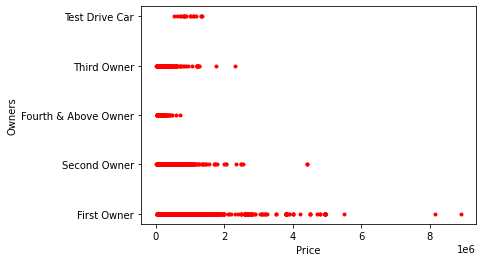

In [94]:
plt.scatter(df_n.selling_price, df_n.owner, marker='.', c='r')
plt.xlabel('Price')
plt.ylabel('Owners')
plt.show()

In [46]:
ohe = OneHotEncoder(drop = 'first')

In [47]:
X_train = ohe.fit_transform(df_n[['fuel', 'owner']]).toarray()

In [50]:
data = np.hstack((df_n[['name', 'km_driven']].values, X_train))

In [74]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,Maruti 800 AC,70000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,50000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,46000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,141000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),80000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4336,Hyundai i20 Magna 1.4 CRDi,80000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4337,Maruti 800 AC BSIII,83000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4338,Hyundai Creta 1.6 CRDi SX Option,90000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
counts = df_n['name'].value_counts()

In [65]:
threshold = 10

In [66]:
replace = counts[counts <= threshold].index

In [67]:
pd.get_dummies(df_n['name'].replace(replace, 'uncommon'))

,Audi A4 3.0 TDI Quattro,Audi A6 2.0 TDI Premium Plus,BMW X5 xDrive 30d xLine,Chevrolet Beat Diesel LS,Chevrolet Beat Diesel LT,Chevrolet Beat LT,Chevrolet Beat LT Option,Chevrolet Spark 1.0 LS,Ford Ecosport 1.5 DV5 MT Titanium,Ford Figo Diesel Titanium,...,Mercedes-Benz C-Class Progressive C 220d,Renault Duster 85PS Diesel RxL,Renault KWID 1.0 RXT Optional,Renault KWID RXT,Skoda Laura Ambiente 2.0 TDI CR MT,Tata Indica GLS BS IV,Tata Indigo CR4,Tata New Safari DICOR 2.2 EX 4x2,Toyota Fortuner 4x2 AT,uncommon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
